## TP3: Image

In [15]:
import kagglehub
import os
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
import random
import numpy as np 

### Telechargement du dataset

In [5]:
path = kagglehub.dataset_download('msarmi9/food101tiny')
print("path to dataset files",path)

path to dataset files C:\Users\rayan\.cache\kagglehub\datasets\msarmi9\food101tiny\versions\1


### Dimension et visualisation d'image

Categories: ['apple_pie', 'bibimbap', 'cannoli', 'edamame', 'falafel']
Nombre d'images dans cannoli: 150
Dimension de l'image: (512, 512)


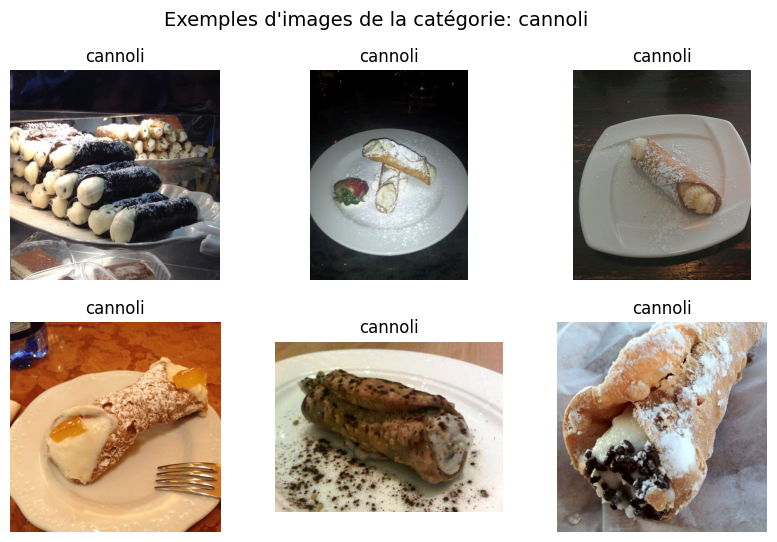

In [6]:
train_path = os.path.join(path, "data","food-101-tiny","train")

categories = os.listdir(train_path)
print("Categories:", categories[:5])

# Choisir une catégorie au hasard
cat = random.choice(categories)
cat_path = os.path.join(train_path, cat)

# Liste des images de cette catégorie
images = os.listdir(cat_path)
print(f"Nombre d'images dans {cat}:", len(images))

#Charger une image et afficher ses dimensions
img_path = os.path.join(cat_path, random.choice(images))
img = Image.open(img_path)
print("Dimension de l'image:", img.size)  # (largeur, hauteur)

# 3. Visualiser quelques images
plt.figure(figsize=(10, 6))
for i in range(6):
    img_path = os.path.join(cat_path, random.choice(images))
    img = Image.open(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(cat)
plt.suptitle(f"Exemples d'images de la catégorie: {cat}", fontsize=14)
plt.show()

### Transformation d'image

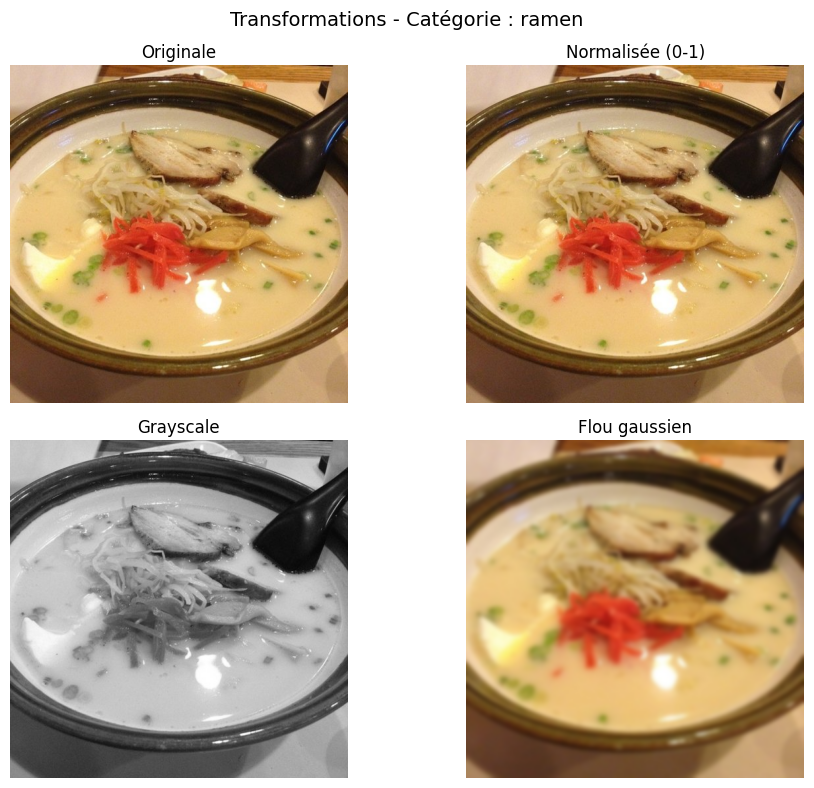

In [ ]:
cat = random.choice(categories)
cat_path = os.path.join(train_path, cat)
img_path = os.path.join(cat_path, random.choice(os.listdir(cat_path)))

img = Image.open(img_path)
img_array = np.array(img)

# Transformation 1 : Normalisation
img_norm = img_array.astype("float32") / 255.0

# Transformation 2 : Grayscale
img_gray = img.convert("L")

# Transformation 3 : Flou gaussien
img_blur = img.filter(ImageFilter.GaussianBlur(radius=3))

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Originale")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_norm)
plt.title("Normalisée (0-1)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img_blur)
plt.title("Flou gaussien")
plt.axis("off")

plt.suptitle(f"Transformations - Catégorie : {cat}", fontsize=14)
plt.tight_layout()
plt.show()

### Calcule de la moyenne et l’écart-type des pixels d’une image.

Moyenne des pixels : 0.4138
Écart-type des pixels : 0.3295


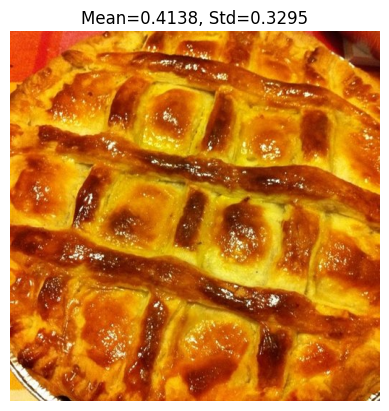

In [24]:
cat = random.choice(categories)
cat_path = os.path.join(train_path, cat)
img_path = os.path.join(cat_path, random.choice(os.listdir(cat_path)))

img = Image.open(img_path)

img_array = np.array(img) / 255.0  # normalisation 0-1

# Calculer moyenne et écart-type
mean_val = np.mean(img_array)
std_val = np.std(img_array)

print(f"Moyenne des pixels : {mean_val:.4f}")
print(f"Écart-type des pixels : {std_val:.4f}")

plt.imshow(img_array)
plt.title(f"Mean={mean_val:.4f}, Std={std_val:.4f}")
plt.axis("off")
plt.show()